# Временные ряды. Pandas.

## Pandas - разработка комьюнити [pydata](https://pydata.org), нацеленная на обработку 1-мерных и многомерных данных с привязкой (табличных данных)

Работаем с массивом аномалий температуры Гадлей центра (csv файл). Скачать можно [здесь](https://mega.nz/#!C0tDSKwJ!kWaLb9qzYT5MpFqayG_VGiJhcWfSZ_FcFa55DCvaSx4)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Идем в папку, куда скачали

In [2]:
!head /mnt/WORK2/Data/HadCRUT4/HadCRUT4.csv

time,temperature_anomaly
1850-01-16,-0.905886
1850-02-15,-0.20506707
1850-03-16,-0.7614886
1850-04-16,-0.5868869
1850-05-16,-0.40005884
1850-06-16,-0.2075096
1850-07-16,-0.11059598
1850-08-16,-0.1619361
1850-09-16,-0.43730184


In [3]:
data = pd.read_csv('/mnt/WORK2/Data/HadCRUT4/HadCRUT4.csv',index_col='time',parse_dates=True)

In [4]:
data.head()

,temperature_anomaly
time,
1850-01-16,-0.905886
1850-02-15,-0.205067
1850-03-16,-0.761489
1850-04-16,-0.586887
1850-05-16,-0.400059


In [5]:
data.tail()

,temperature_anomaly
time,
2018-07-16,0.695979
2018-08-16,0.693316
2018-09-16,0.669992
2018-10-16,0.823503
2018-11-16,0.649912


In [6]:
data.describe()

,temperature_anomaly
count,2027.000000
mean,-0.081373
std,0.360707
min,-1.235765
25%,-0.334590
50%,-0.126705
75%,0.104972
max,1.250971


In [7]:
plt.rcParams.update({'figure.dpi':150,'savefig.dpi':150,'savefig.bbox':'tight'})

## Арифметика и визуализация данных

Индекс это индекс даты/времени. Это очень важно!

In [8]:
data.index

DatetimeIndex(['1850-01-16', '1850-02-15', '1850-03-16', '1850-04-16',
               '1850-05-16', '1850-06-16', '1850-07-16', '1850-08-16',
               '1850-09-16', '1850-10-16',
               ...
               '2018-02-15', '2018-03-16', '2018-04-16', '2018-05-16',
               '2018-06-16', '2018-07-16', '2018-08-16', '2018-09-16',
               '2018-10-16', '2018-11-16'],
              dtype='datetime64[ns]', name='time', length=2027, freq=None)

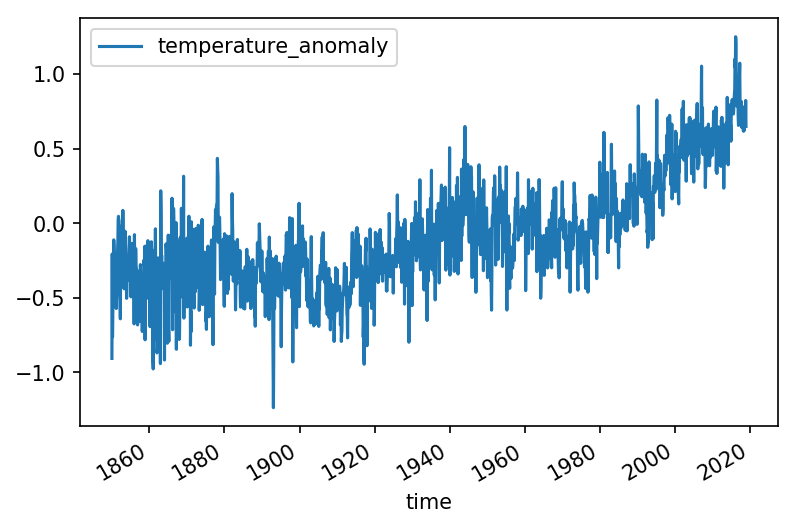

In [9]:
data.plot()

Pandas использует matplotlib в качестве библиотеки визуализации, поэтому всё что работало в предыдущем уроке должно сработать здесь!

Мы не загрузили окружение pylab, поэтому функции визуализации будем брать из matplotlib

Text(0, 0.5, 'Temperature anomaly [° C]')

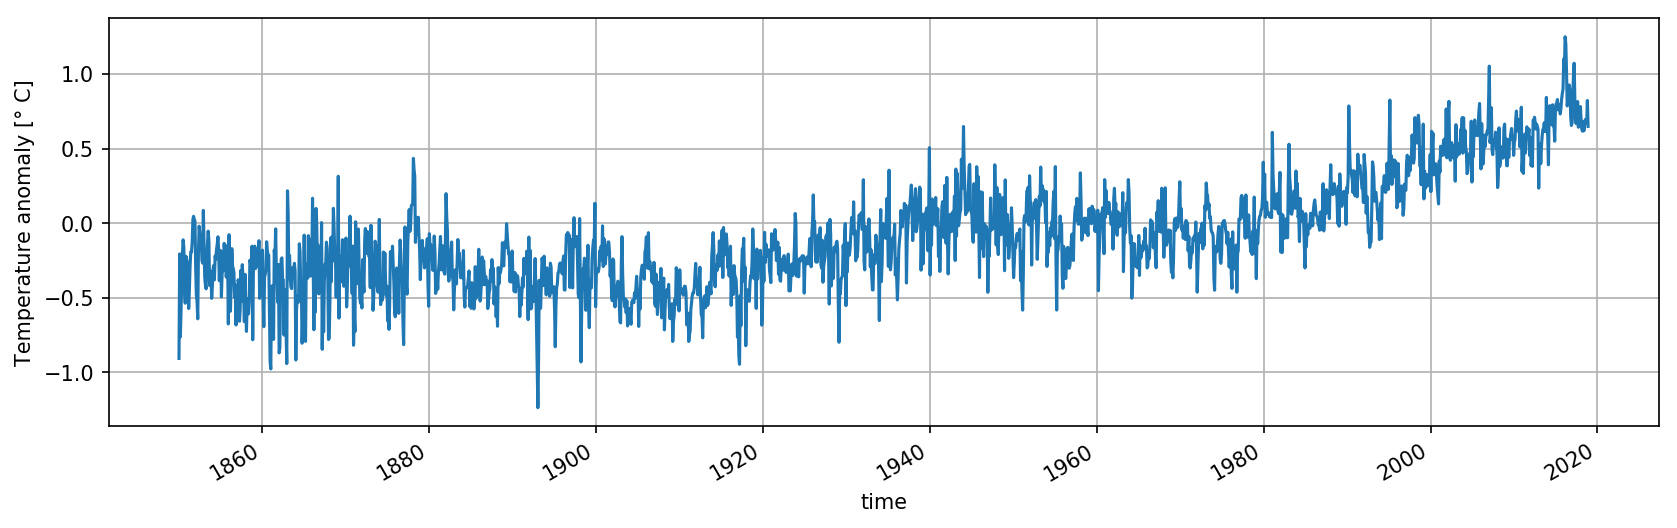

In [10]:
data.plot(legend=False,figsize=plt.figaspect(0.3))
plt.grid()
plt.ylabel('Temperature anomaly [\u00b0 C]')

В matplotlib реализован ряд стилей!

In [11]:
plt.style.use('ggplot')

Text(0, 0.5, 'Temperature anomaly [° C]')

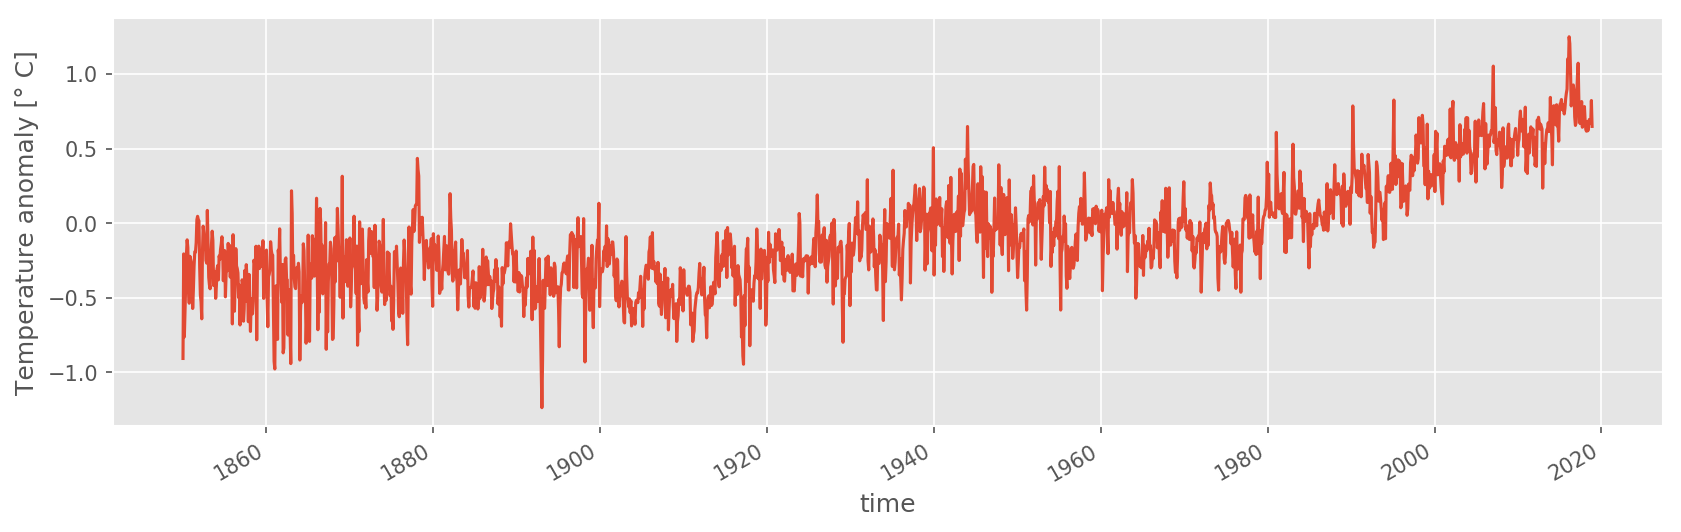

In [12]:
data.plot(legend=False,figsize=plt.figaspect(0.3))
plt.ylabel('Temperature anomaly [\u00b0 C]')

*Примечание*: в python в функцию могут быть переданы аргументы и параметры. Правильнее сказать, позиционные и именованные аргументы. Например,

In [13]:
%pdoc plt.plot

Class docstring:
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The following two calls yield identical results:
    
    >>> plot(x, y, 'go--', linewidth=2, markersi

в функцию plt.plot должен быть передан как минимум 1 позиционный аргумент - значение функции (а лучше аргумент функции и её значение), а также именнованные аргументы - в частности, все что отвечает за стиль линии, толщину и т.п.

В python принято передавать позиционные аргументы в функцию используя звездочку "\*", а именные "\**".


Text(0, 0.5, 'Temperature anomaly [° C]')

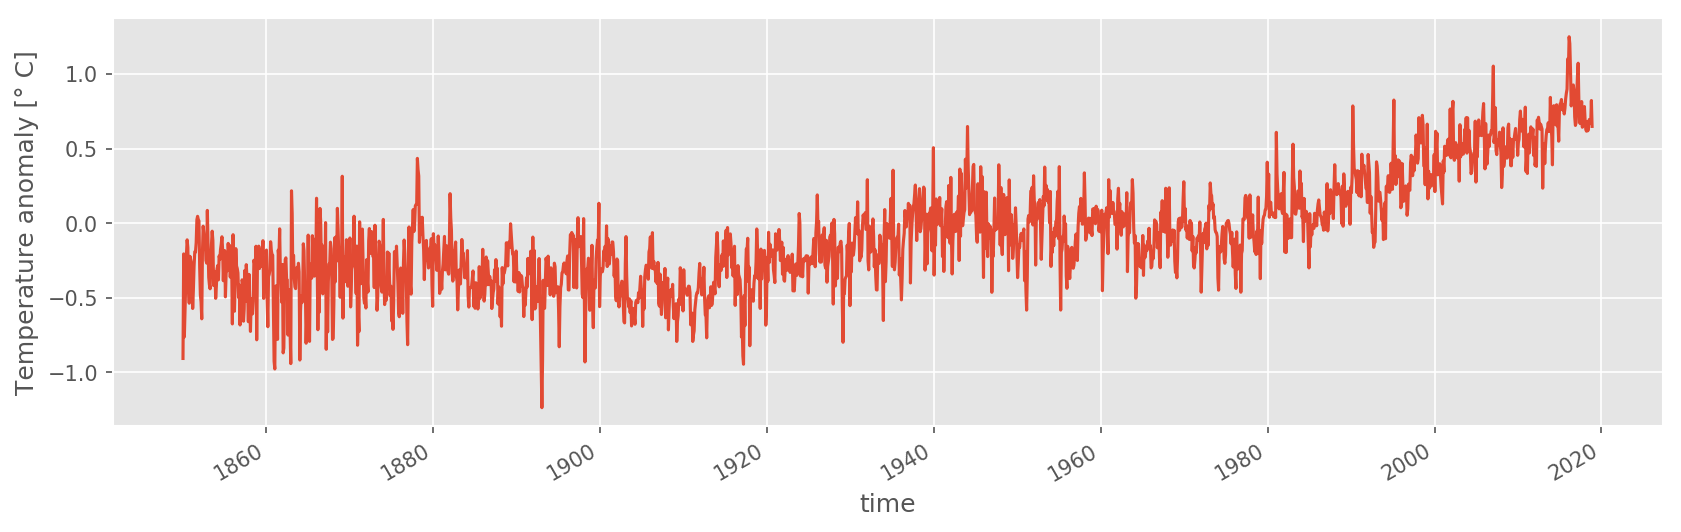

In [14]:
data.plot(legend=False,figsize=plt.figaspect(0.3))
ax = plt.gca()
plt.ylabel('Temperature anomaly [\u00b0 C]')

In [15]:
hlkwargs = dict(linestyle='--',lw=2,alpha=0.5)
ax.get_xlim()

(672265.75, 740097.25)

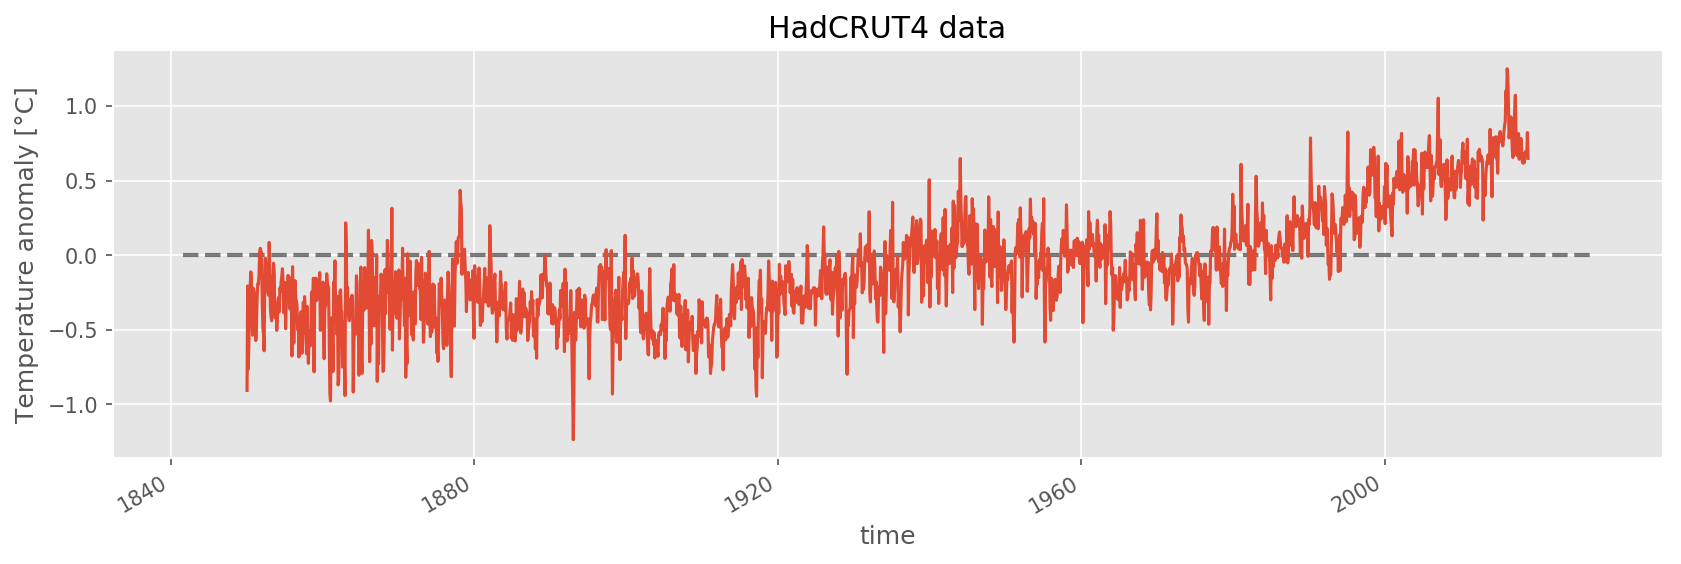

In [16]:
data.plot(legend=False,figsize=plt.figaspect(0.3))
plt.ylabel('Temperature anomaly [\u00b0C]')
plt.title('HadCRUT4 data')
plt.hlines(0.,*plt.gca().get_xlim(),**hlkwargs)
# savefig('./Results/hadcrut_00.png')

Арифметика в pandas выполняется аналогично!

In [17]:
data.mean()

temperature_anomaly   -0.081373
dtype: float64

In [18]:
# или
import numpy as np
np.mean(data)

temperature_anomaly   -0.081373
dtype: float64

In [19]:
data.std()

temperature_anomaly    0.360707
dtype: float64

In [20]:
data.median()

temperature_anomaly   -0.126705
dtype: float64

In [21]:
data.mean().values

array([-0.08137327])

In [22]:
(data.mean().values,data.std().values)

(array([-0.08137327]), array([0.36070664]))

In [23]:
mean,std = data.mean().values,data.std().values

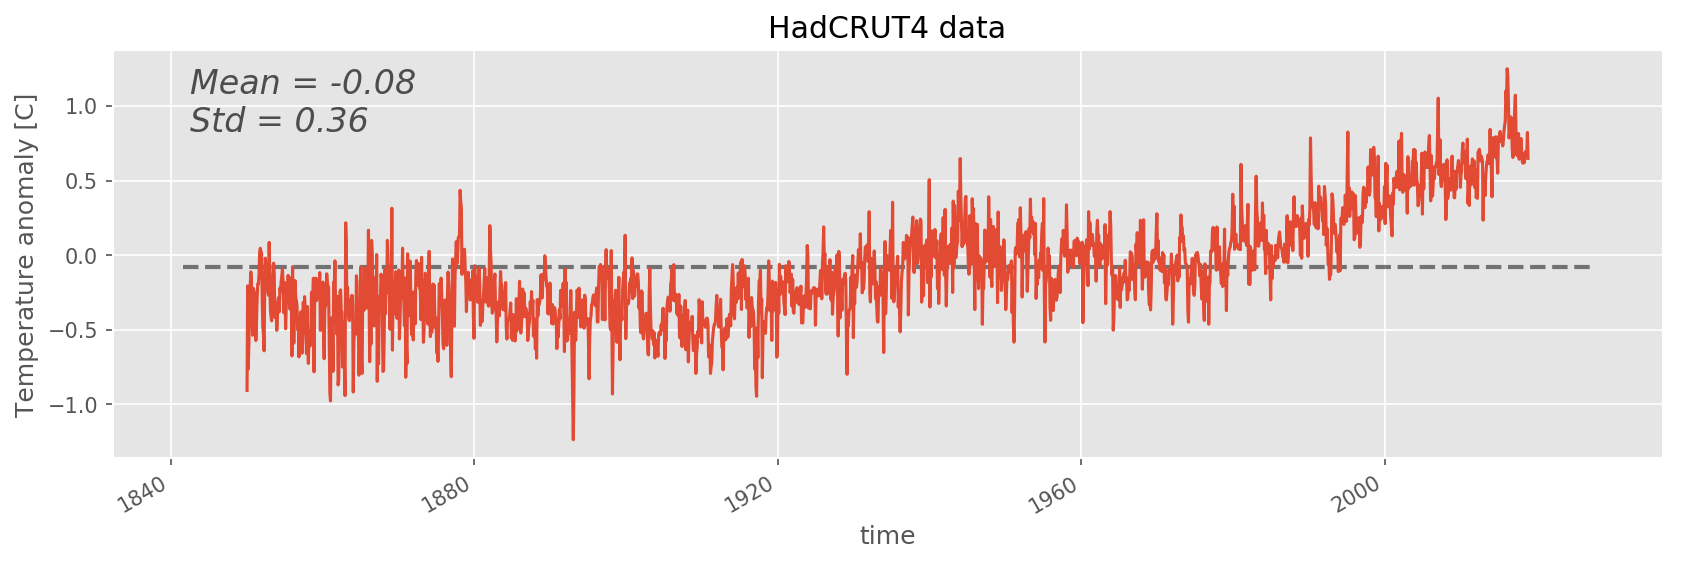

In [24]:
data.plot(legend=False,figsize=plt.figaspect(0.3))
plt.annotate('Mean = {mean:4.2f}\nStd = {std:4.2f}'.format(mean=data.mean().values[0],std=data.std().values[0]),(0.05,0.8),
         xycoords='axes fraction',fontsize=16,style='italic',color='0.3')
plt.ylabel('Temperature anomaly [C]')
plt.title('HadCRUT4 data')
plt.hlines(data.mean().values,*plt.gca().get_xlim(),**hlkwargs)
# savefig('./Results/hadcrut_01.png')

Pandas создаёт структуры данных, с помощью которых значительно упрощаются некоторые операции.

Выборка

In [25]:
data.loc['1980':]

,temperature_anomaly
time,
1980-01-16,0.124917
1980-02-15,0.330120
1980-03-16,0.040596
1980-04-16,0.124897
1980-05-16,0.141274
1980-06-16,0.059716
1980-07-16,0.062456
1980-08-16,0.070479
1980-09-16,0.044574


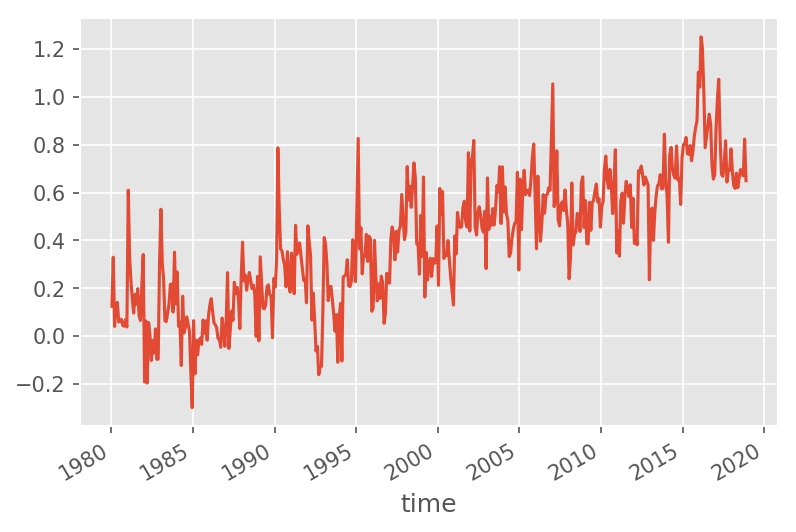

In [26]:
data.loc['1980':].plot(legend=False)

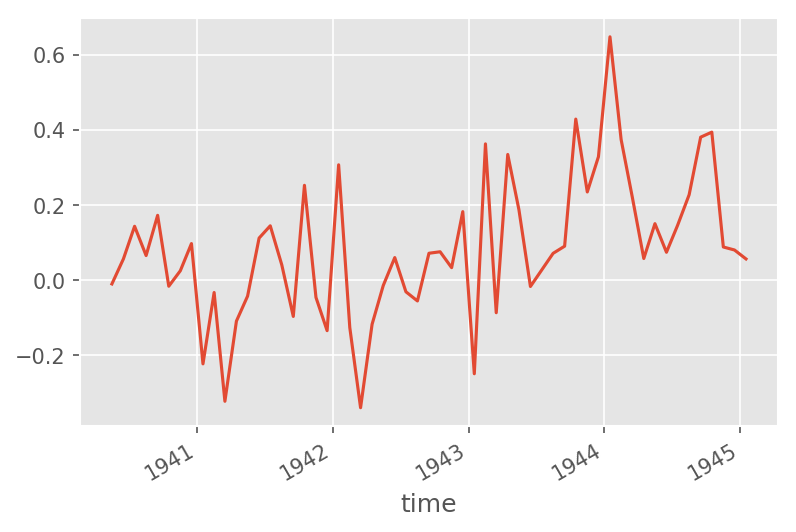

In [27]:
data.loc['1940-05':'1945-01'].plot(legend=False)

In [28]:
#медгодовая изменчивость в одну строку
datay = data.resample('Y').mean()

In [29]:
datay.head()

,temperature_anomaly
time,
1850-12-31,-0.397844
1851-12-31,-0.194319
1852-12-31,-0.243032
1853-12-31,-0.291261
1854-12-31,-0.253575


Text(0, 0.5, 'Temperature anomaly [°C]')

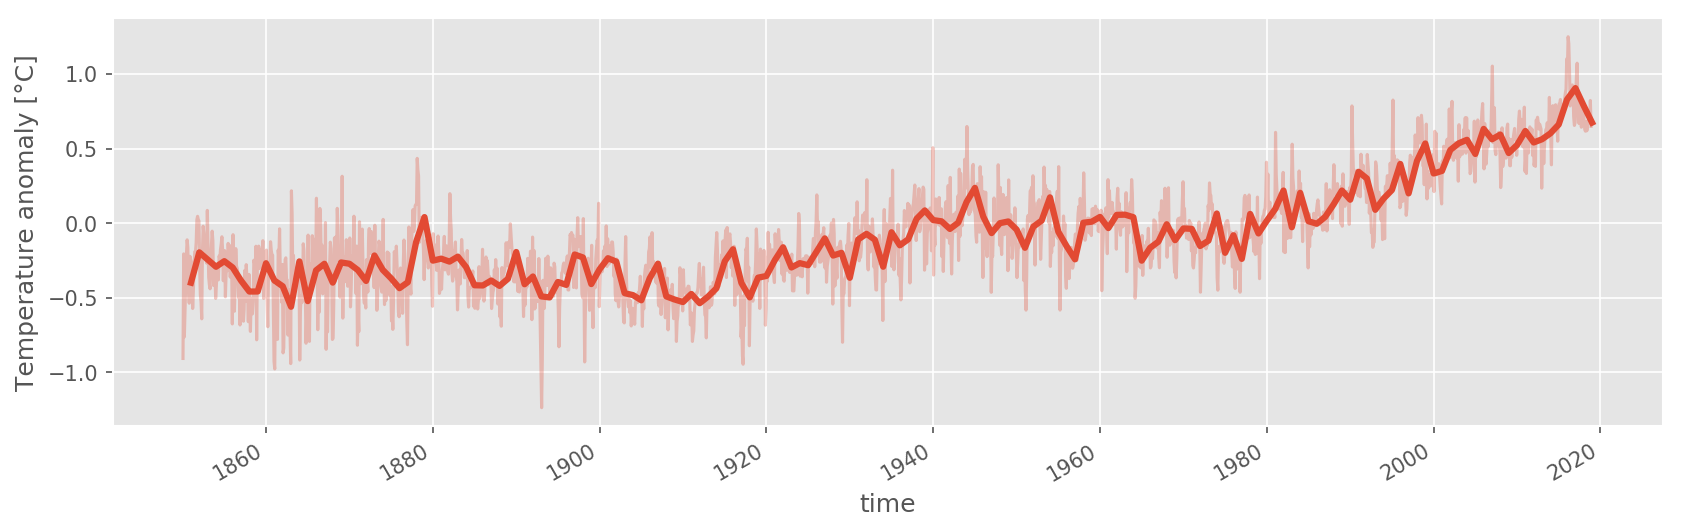

In [30]:
p = data.plot(legend=False,figsize=plt.figaspect(0.3),alpha=0.3,)
datay.plot(legend=False,color=p.lines[0].get_color(),ax=plt.gca(),lw=3.)
plt.ylabel('Temperature anomaly [\u00b0C]')

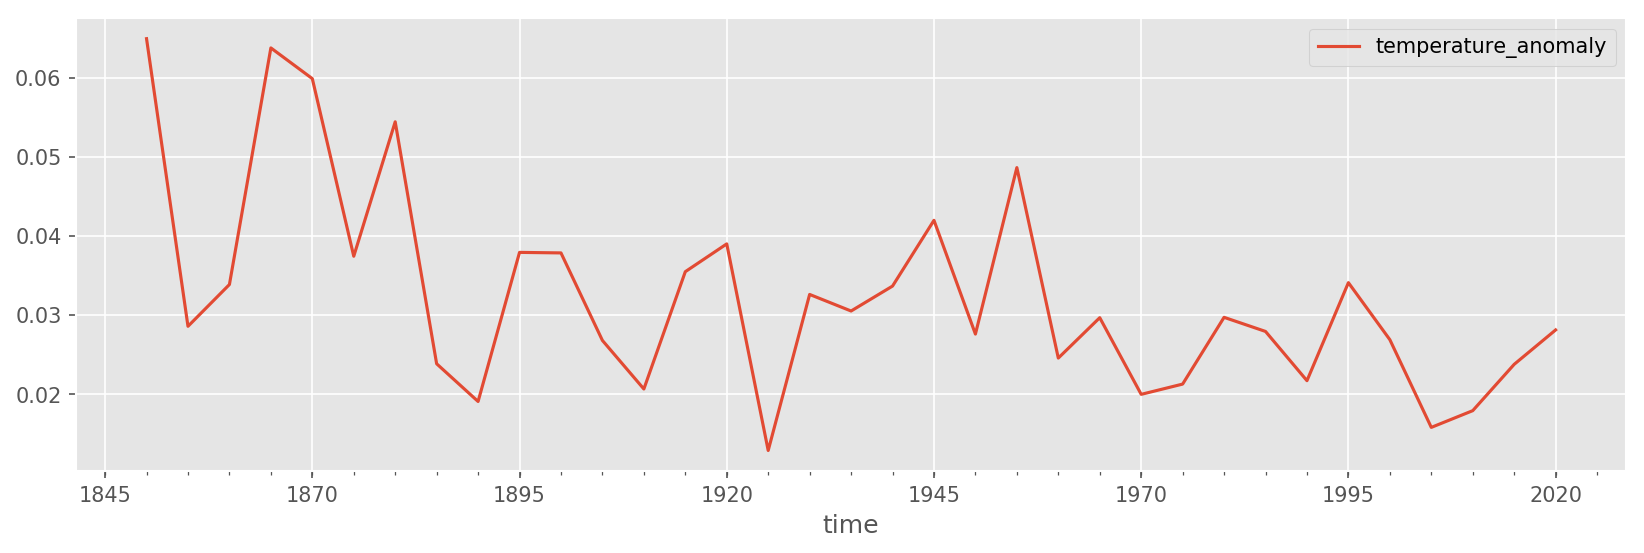

In [31]:
# дисперсия за полгода в одну строку
p = data.resample('5Y').var().plot(figsize=plt.figaspect(0.3),label = '5-year variance')

In [32]:
#декадная изменчивость в одну строку
datay = data.resample('10Y').mean()

Text(0, 0.5, 'Temperature anomaly [°C]')

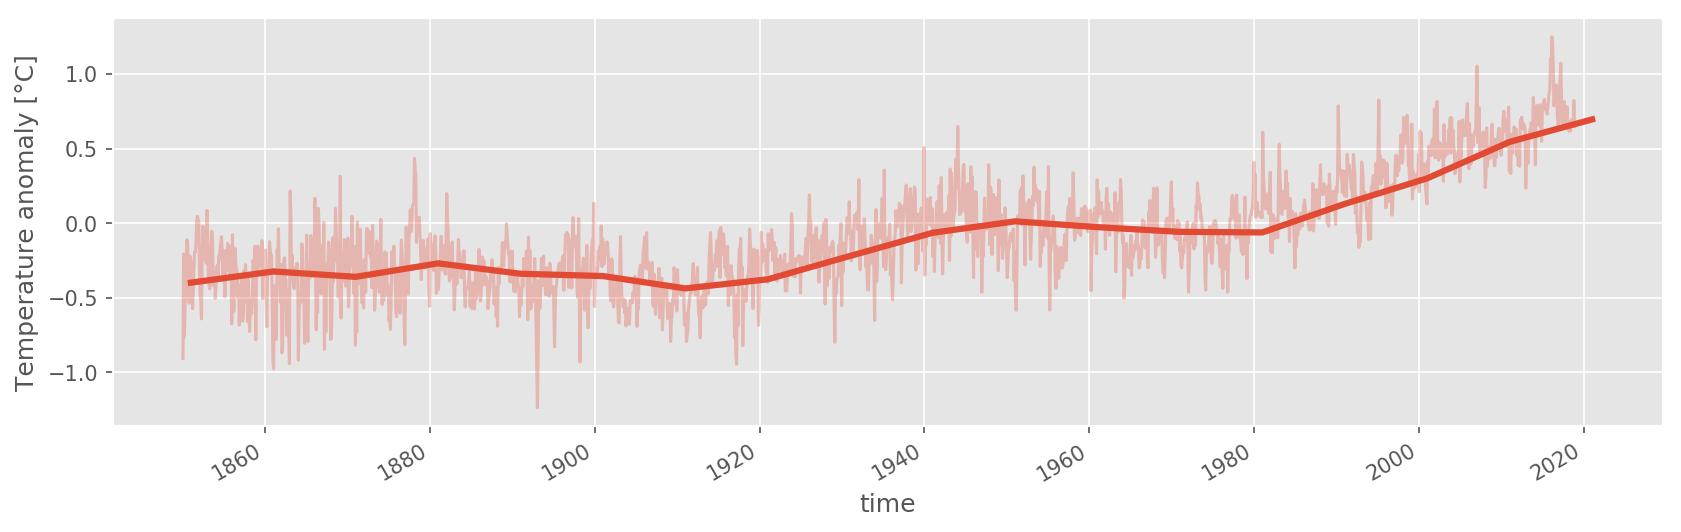

In [33]:
p = data.plot(legend=False,figsize=plt.figaspect(0.3),alpha=0.3,)
datay.plot(legend=False,color=p.lines[0].get_color(),ax=plt.gca(),lw=3.)
plt.ylabel('Temperature anomaly [\u00b0C]')

Удалим декадную изменчивость из исходного ряда

In [34]:
datay = datay.asfreq('M').interpolate()

In [35]:
dt = data.asfreq('M',method='nearest')-datay

In [36]:
dt = dt.dropna()

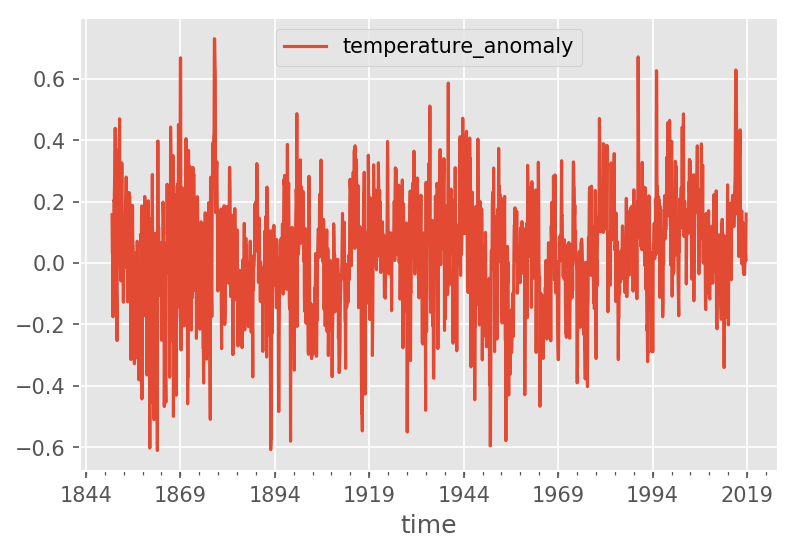

In [37]:
dt.plot()

Cезонная изменчивость

In [38]:
dt['month'] = dt.index.month

In [39]:
clim = dt.groupby('month').mean()

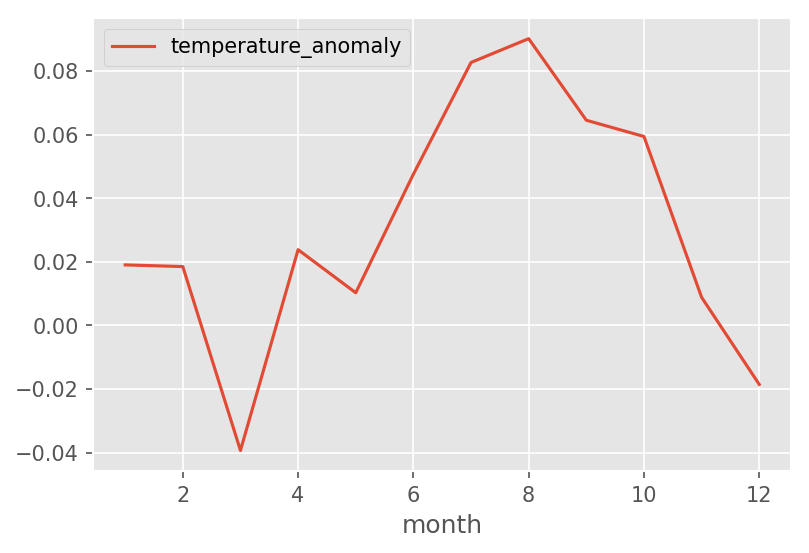

In [40]:
clim.plot()

Скользящее среднее

In [42]:
dataroll = data.rolling(12,center=True).mean()

In [43]:
dataroll.columns = ['12 month rolling mean']

In [44]:
dataroll2 = data.rolling(120,center=True).mean()
dataroll2.columns = ['10 year rolling mean']

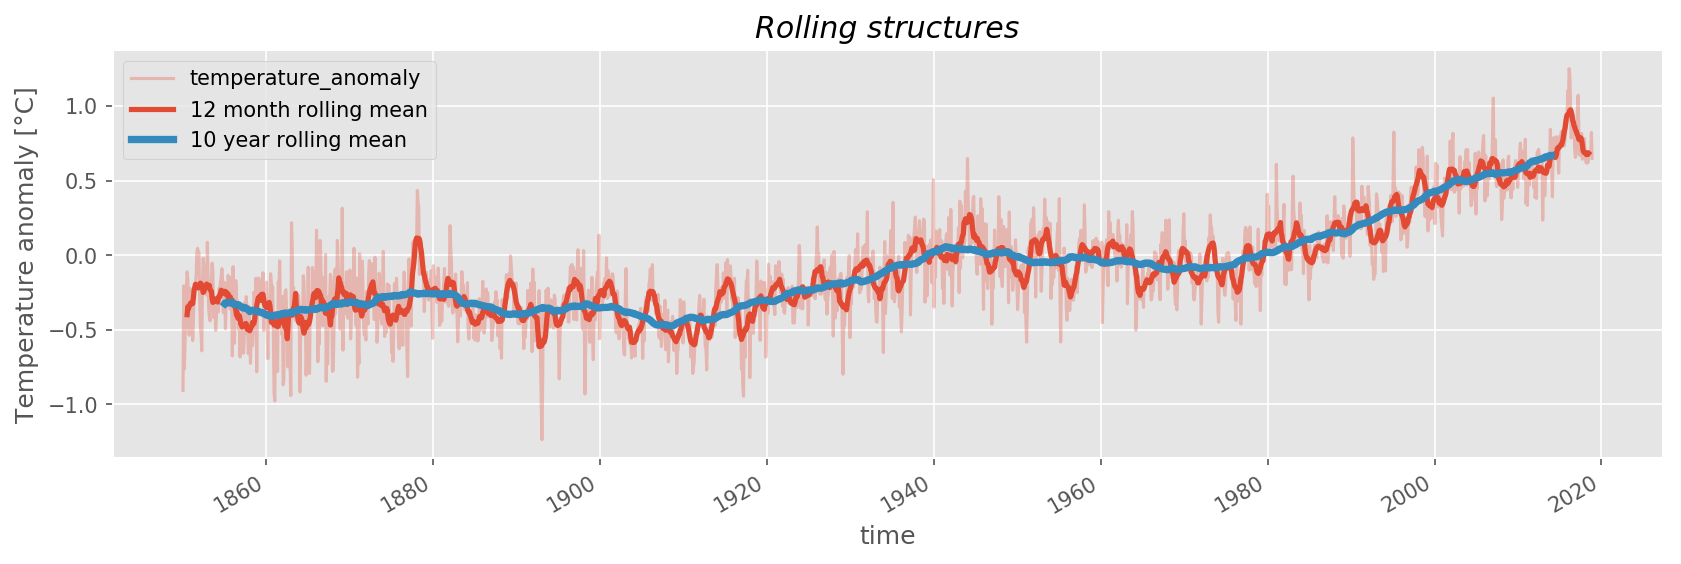

In [45]:
p = data.plot(legend=False,figsize=plt.figaspect(0.3),alpha=0.3,)
dataroll.plot(legend=False,color=p.lines[0].get_color(),ax=plt.gca(),lw=2.5,)
dataroll2.plot(legend=False,ax=plt.gca(),lw=3.5,)
plt.ylabel('Temperature anomaly [\u00b0C]')
plt.title('Rolling structures',style='italic')
plt.legend()